In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
import scipy.constants as const

In [12]:
# Daten einlesen Einfachspalt
x1r=np.genfromtxt('einzelspalt.dat', usecols=(0))
I1r=np.genfromtxt('einzelspalt.dat', usecols=(1))
a=66
b=71
c=len(I1r)
X=[0]
I1=X*c
I11=X*a
I12=X*(b-a)
I13=X*(c-b)

# Skalenteile in Ampere umrechnen
i=0
while i<a:
    I11[i]=I1r[i]*(0.03/60)
    i=i+1
j=a
while j<b:
    I12[j-a]=I1r[j]*(0.1/50)
    j=j+1
k=b
while k<c:
    I13[k-b]=I1r[k]*(0.03/60) 
    k=k+1
I1mds=(I11+I12+I13)
l=0
while l<len(I1):
    I1[l]=I1r[l]*1e-6
    l=l+1
x1=x1r*1e-3

phi1=X*len(x1)
o=0
while o < len(x1):
    phi1[o]=np.arctan((x1[o]-0.04150000000000001)/1.050)
    o=o+1
#Dunkelstrom abziehen
q=0
while q< len(I1mds):
    I1[q]=I1mds[q]-0.00000001
    q=q+1

In [18]:
x2r=np.genfromtxt('doppelspalt.dat', usecols=(0))
I2r=np.genfromtxt('doppelspalt.dat', usecols=(1))
b1=0
a1=b2=10
a2=b3=11
a3=b4=13
a4=b5=21
a5=b6=25
a6=b7=32
a7=b8=36
a8=b9=39
a9=b10=46
a10=b11=49
a11=b12=len(I2r)
X=[0]
I2=X*a11
I21=X*a1
I22=X*(a2-a1)
I23=X*(a3-a2)
I24=X*(a4-a3)
I25=X*(a5-a4)
I26=X*(a6-a5)
I27=X*(a7-a6)
I28=X*(a8-a7)
I29=X*(a9-a8)
I210=X*(a10-a9)
I211=X*(a11-a10)

while b1<a1:
    I21[b1]=I2r[b1]*(0.03/60)
    b1=b1+1

while b2<a2:
    I22[b2-a1]=I2r[b2]*(0.3/60)
    b2=b2+1

while b3<a3:
    I23[b3-a2]=I2r[b3]*(0.03/60)
    b3=b3+1

while b4<a4:
    I24[b4-a3]=I2r[b4]*(0.3/60)
    b4=b4+1

while b5<a5:
    I25[b5-a4]=I2r[b5]*(1/50)
    b5=b5+1

while b6<a6:
    I26[b6-a5]=I2r[b6]*(3/60)
    b6=b6+1

while b7<a7:
    I27[b7-a6]=I2r[b7]*(1/60)
    b7=b7+1

while b8<a8:
    I28[b8-a7]=I2r[b8]*(0.3/60)
    b8=b8+1

while b9<a9:
    I29[b9-a8]=I2r[b9]*(0.1/50)
    b9=b9+1

while b10<a10:
    I210[b10-a9]=I2r[b10]*(0.03/60)
    b10=b10+1

while b11<a11:
    I211[b11-a10]=I2r[b11]*(0.03/60)
    b11=b11+1

I2mds=(I21+I22+I23+I24+I25+I26+I27+I28+I29+I210+I211)
m=0
while m<len(I2):
    I2mds[m]=I2mds[m]*1e-6
    m=m+1
x2=x2r*1e-3

# Umrechnung in Winkel
phi2=X*len(x2)
n=0
while n < len(x2):
    phi2[n]=np.arctan((x2[n]-0.02700000000000001)/1.050)
    n=n+1
#Dunkelstrom abziehen
p=0
while p< len(I2mds):
    I2[p]=I2mds[p]-0.00000001
    p=p+1
print(I2mds)


[1.5e-09, 2e-09, 3e-09, 2e-09, 1e-09, 1.5e-09, 2e-09, 1.5e-09, 1e-09, 1.5e-09, 4e-08, 4e-09, 1.5e-09, 1.5e-08, 2e-08, 1.5e-08, 1.5e-08, 3e-08, 6e-08, 6e-08, 4e-08, 1.2e-07, 1e-07, 8e-08, 1e-07, 3.5000000000000004e-07, 9.5e-07, 1.15e-06, 8e-07, 4.5e-07, 4.5e-07, 8e-07, 3.333333333333333e-07, 1.3333333333333334e-07, 1e-07, 1.1666666666666667e-07, 1.5e-07, 4e-08, 2.85e-07, 3.7999999999999996e-08, 7.200000000000001e-08, 2.6e-08, 1e-08, 1.6e-08, 1.2e-08, 4e-08, 4e-09, 2.15e-08, 1.75e-08, 6.5e-09, 1.45e-08, 1.6e-08, 3.5e-09, 1.55e-08, 1.45e-08, 1.05e-08, 1.8999999999999998e-08, 8e-09, 5e-09, 2.6e-08, 2e-08, 2.65e-08, 1.55e-08, 8.5e-09, 6.5e-09, 7e-09, 9.499999999999999e-09, 9.499999999999999e-09, 9.000000000000001e-09, 2.8e-08, 2.2999999999999998e-08, 1.8000000000000002e-08, 1.4e-08, 1.05e-08, 2.35e-08, 1.55e-08, 2.1e-08, 1.8000000000000002e-08, 1.25e-08, 1.1e-08, 9.000000000000001e-09, 7e-09]


A = 325.98142273989788009203 ± 27.20386831492058021809
b = 0.00085500977204549817 ± 0.00008502677764280214


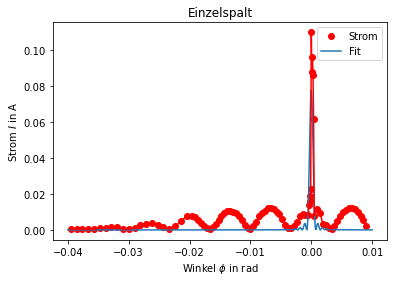

In [15]:
# Fit
lamda=635e-9
#b=0.00015
def einzelspalt(phi1,A, b):
    return (A**2*b**2*(lamda/(const.pi*b*np.sin(phi1)))*(lamda/(const.pi*b*np.sin(phi1)))*np.sin((const.pi*b*np.sin(phi1))/lamda)*np.sin((const.pi*b*np.sin(phi1))/lamda))
#def fourier(phi1,A,b):
#    return (A*lamda/(const.pi*np.sin(phi1))*np.exp((const.pi*b*np.sin(phi1))j/lamda)*np.sin(const.pi*np.sin(phi1)*b/lamda))

a=np.linspace(-0.04,0.01,500)
params, covariance_matrix = curve_fit(einzelspalt, phi1, I1,p0=(1000,0.00030))

uncertainties = np.sqrt(np.diag(covariance_matrix))

for name, value, uncertainty in zip('Ab', params, uncertainties): 
   print(f'{name} = {value:8.20f} ± {uncertainty:.20f}')
#params2, covariance_matrix2 = curve_fit(fourier, phi1, I1)

#uncertainties2 = np.sqrt(np.diag(covariance_matrix2))

#for name, value, uncertainty in zip('Ab', params2, uncertainties2): 
 #  print(f'{name} = {value:8.20f} ± {uncertainty:.20f}')

plt.plot(phi1,I1,'ro',label='Strom')
plt.plot(a, einzelspalt(a, *params),label='Fit')
#plt.plot(a, fourier(a, *params2),label='F-Trafo')
#plt.plot(a, einzelspalt(a, 2200,0.00015),label='test')
plt.plot(phi1,I1,'r-')
plt.xlabel('Winkel $\phi$ in rad')
plt.ylabel('Strom $I$ in A')
plt.legend(loc="best")
plt.title('Einzelspalt')
plt.savefig('Einzelspalt.pdf')

s = 0.00080230821859353298 ± 0.00000453013886833479
b = 0.00008195088405681429 ± 0.00000421563112994644
A = 0.00000032179008141565 ± 0.00000001882710426330
Peak bei x= 0.027 m und I= 1.14e-06 A r= 27
0.029 0.03 0.031
82


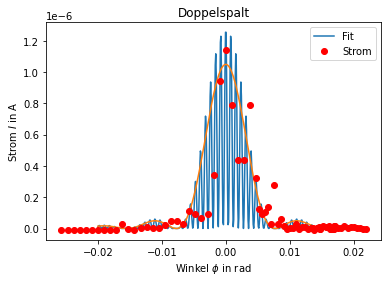

In [34]:
#A1=0.0000005
def doppelspalt(phi2,s,b,A1):
    return(A1*4*np.cos(const.pi*s*np.sin(phi2)/lamda)**2*(lamda/(const.pi*b*np.sin(phi2)))**2*np.sin((const.pi*b*np.sin(phi2))/lamda)**2)

params3, covariance_matrix3 = curve_fit(doppelspalt, phi2, I2, maxfev=10000,p0=(0.0009,0.00015,0.0000005))

uncertainties3 = np.sqrt(np.diag(covariance_matrix3))

for name, value, uncertainty in zip('sbA', params3, uncertainties3): 
    print(f'{name} = {value:8.20f} ± {uncertainty:.20f}')

z=np.linspace(-0.02,0.02,num=500)

#plt.plot(z,doppelspalt(z,0.0009,0.00015))
plt.plot(z, doppelspalt(z, *params3),label='Fit')
plt.plot(z,einzelspalt(z,1/0.08,0.00008195088405681429))
plt.plot(phi2,I2,'ro',label='Strom')
#plt.plot(phi2,I2,'r-')
plt.xlabel('Winkel $\phi$ in rad')
plt.ylabel('Strom $I$ in A')
plt.legend(loc="best")
plt.title('Doppelspalt')
plt.savefig('doppelspalt.pdf')
peak=0
r=0
while r < len(I2):
    if I2[r] > I2[peak]:
        peak=r
        r=r+1
    else:
        r=r+1
print('Peak bei x=',x2[peak],'m und I=',I2[peak],'A r=',peak)
print(x2[peak+2],x2[peak+3],x2[peak+4])
print(len(I2mds))

In [64]:
tex1=0
tex2=var1=30
tex3=var2=60
var3=len(I1mds)
I1mds1=X*31
I1mds2=X*31
I1mds3=X*31
x11=X*31
x12=X*31
x13=X*31
while tex1 < var1:
    I1mds1[tex1]=I1mds[tex1]
    x11[tex1]=x1[tex1]
    tex1=tex1+1

while tex2 < var2:
    I1mds2[tex2-tex1]=I1mds[tex2]
    x12[tex2-tex1]=x1[tex2]
    tex2=tex2+1

while tex3 < var3:
    I1mds3[tex3-tex2]=I1mds[tex3]
    x13[tex3-tex2]=x1[tex3]
    tex3=tex3+1

tex4=0
tex5=var4=28
tex6=var5=56
var6=len(I2mds)
I2mds1=X*29
I2mds2=X*28
I2mds3=X*26
x21=X*28
x22=X*28
x23=X*26



datenRh1=np.array([I1mds1,
                x11,
                I1mds2,
                x12,
                I1mds3,
                x13])

datenRh1TR=np.transpose(datenRh1)
np.savetxt("daten1.tex",datenRh1TR, fmt="%2.3f", delimiter="  &   ")

datenRh2=np.array([I2mds,
                x2])


datenRh22=datenRh2.astype('f')
datenRh2TR=np.transpose(datenRh22)


print(datenRh2TR)
np.savetxt("daten2.tex",datenRh2TR, fmt="%.18f", delimiter="  &   ")

[[1.5000000e-09 0.0000000e+00]
 [1.9999999e-09 1.0000000e-03]
 [3.0000000e-09 2.0000001e-03]
 [1.9999999e-09 3.0000000e-03]
 [9.9999997e-10 4.0000002e-03]
 [1.5000000e-09 4.9999999e-03]
 [1.9999999e-09 6.0000001e-03]
 [1.5000000e-09 7.0000002e-03]
 [9.9999997e-10 8.0000004e-03]
 [1.5000000e-09 8.9999996e-03]
 [4.0000000e-08 9.9999998e-03]
 [3.9999999e-09 1.1000000e-02]
 [1.5000000e-09 1.2000000e-02]
 [1.4999999e-08 1.3000000e-02]
 [2.0000000e-08 1.4000000e-02]
 [1.4999999e-08 1.5000000e-02]
 [1.4999999e-08 1.6000001e-02]
 [2.9999999e-08 1.7000001e-02]
 [5.9999998e-08 1.7999999e-02]
 [5.9999998e-08 1.8999999e-02]
 [4.0000000e-08 2.0000000e-02]
 [1.2000000e-07 2.1000000e-02]
 [1.0000000e-07 2.2000000e-02]
 [8.0000000e-08 2.3000000e-02]
 [1.0000000e-07 2.4000000e-02]
 [3.4999999e-07 2.5000000e-02]
 [9.5000001e-07 2.6000001e-02]
 [1.1500000e-06 2.7000001e-02]
 [8.0000001e-07 2.8000001e-02]
 [4.4999999e-07 2.8999999e-02]
 [4.4999999e-07 2.9999999e-02]
 [8.0000001e-07 3.0999999e-02]
 [3.3333